## Machine Learning Model

Football player Market price prediction based on FIFA 21 data set.

Data: https://www.kaggle.com/datasets/yagunnersya/fifa-21-messy-raw-dataset-for-cleaning-exploring




In [1]:
# MAIN LIBS
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import functions_ml
from functions_ml import *

# SKLEARN
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, explained_variance_score, mean_absolute_percentage_error, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Check Working Directory
print (os.getcwd())

/media/christian/D/Bootcamp/Alumno/ds_thebridge_6_22/Cleaning


In [2]:
# Import CSV
df_fifa = pd.read_csv("./data/fifa21_train.csv", sep=",", low_memory=False, index_col=[0])

In [3]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9489 entries, 0 to 9488
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                9489 non-null   int64 
 1   Name              9489 non-null   object
 2   LongName          9489 non-null   object
 3   photoUrl          9489 non-null   object
 4   playerUrl         9489 non-null   object
 5   Nationality       9489 non-null   object
 6   Age               9489 non-null   int64 
 7   ↓OVA              9489 non-null   int64 
 8   POT               9489 non-null   int64 
 9   Club              9489 non-null   object
 10  Contract          9489 non-null   object
 11  Positions         9489 non-null   object
 12  Height            9489 non-null   object
 13  Weight            9489 non-null   object
 14  Preferred Foot    9489 non-null   object
 15  BOV               9489 non-null   int64 
 16  Best Position     9489 non-null   object
 17  Joined        

In [47]:
df_fifa.describe()

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,...,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.00000,9489.000000
mean,215224.355780,27.039203,71.224997,74.067868,71.998630,275.738645,55.716830,50.903467,56.531984,64.564654,...,16.310465,16.523659,1731.221836,383.184003,69.614923,58.762462,63.334809,67.980188,54.66751,68.824112
std,26416.276533,4.148302,4.392340,5.273509,4.400734,73.045145,18.312199,19.805110,17.564008,13.435298,...,17.957784,18.709698,238.932164,31.104762,11.477262,13.378980,8.516892,8.717630,16.64994,8.112545
min,41.000000,16.000000,66.000000,66.000000,66.000000,42.000000,6.000000,3.000000,5.000000,8.000000,...,2.000000,2.000000,882.000000,272.000000,28.000000,16.000000,30.000000,31.000000,15.00000,31.000000
25%,200228.000000,24.000000,68.000000,70.000000,69.000000,256.000000,47.000000,36.000000,49.000000,62.000000,...,8.000000,8.000000,1645.000000,364.000000,64.000000,50.000000,59.000000,64.000000,39.00000,64.000000
50%,219455.000000,27.000000,70.000000,73.000000,71.000000,293.000000,62.000000,56.000000,60.000000,67.000000,...,11.000000,11.000000,1771.000000,383.000000,71.000000,62.000000,64.000000,69.000000,61.00000,70.000000
75%,234249.000000,30.000000,74.000000,78.000000,75.000000,321.000000,68.000000,67.000000,69.000000,72.000000,...,14.000000,14.000000,1882.000000,403.000000,77.000000,68.000000,69.000000,73.000000,68.00000,75.000000
max,259195.000000,42.000000,93.000000,95.000000,93.000000,437.000000,94.000000,95.000000,93.000000,94.000000,...,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.00000,91.000000


In [48]:
df_fifa.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [69]:
# Check nullos and nans 
nullos(df_fifa)

nan in Column  ID : 0
null in Column  ID : 0
nan in Column  Name : 0
null in Column  Name : 0
nan in Column  LongName : 0
null in Column  LongName : 0
nan in Column  photoUrl : 0
null in Column  photoUrl : 0
nan in Column  playerUrl : 0
null in Column  playerUrl : 0
nan in Column  Nationality : 0
null in Column  Nationality : 0
nan in Column  Age : 0
null in Column  Age : 0
nan in Column  ↓OVA : 0
null in Column  ↓OVA : 0
nan in Column  POT : 0
null in Column  POT : 0
nan in Column  Club : 0
null in Column  Club : 0
nan in Column  Contract : 0
null in Column  Contract : 0
nan in Column  Positions : 0
null in Column  Positions : 0
nan in Column  Height : 0
null in Column  Height : 0
nan in Column  Weight : 0
null in Column  Weight : 0
nan in Column  Preferred Foot : 0
null in Column  Preferred Foot : 0
nan in Column  BOV : 0
null in Column  BOV : 0
nan in Column  Best Position : 0
null in Column  Best Position : 0
nan in Column  Joined : 0
null in Column  Joined : 0
nan in Column  Loan 

In [5]:
df_fifa.loc[0:500,"Loan Date End"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
496    NaN
497    NaN
498    NaN
499    NaN
500    NaN
Name: Loan Date End, Length: 501, dtype: object

In [6]:
df_fifa.isna().values.sum()

8926

In [7]:
df_fifa[df_fifa["Hits"].isna()]

,Unnamed: 0,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits


In [8]:
# Checking for useful columns
df_fifa["Height"].head()

0    170cm
1    187cm
2    188cm
3    181cm
4    175cm
Name: Height, dtype: object

In [9]:
# Checking for useful columns
df_fifa["Weight"].head()

0    72kg
1    83kg
2    87kg
3    70kg
4    68kg
Name: Weight, dtype: object

In [3]:
# cleaning Weight Field
field_cleanerx (df_fifa,"Weight","kg")

In [4]:
# cleaning Height Field
field_cleanerx (df_fifa,"Height","cm")

In [24]:
# Regex search for remaining string within the Height field
df_fifa[df_fifa['Height'].str.contains('\D+')==True]["Height"].count()

40

In [5]:
# Create indexes with the remain strings which are Feet and Inches
# Converting the inches and feet values in metric
lista_inches = df_fifa[df_fifa['Height'].str.contains('\D+')==True]["Height"].index
convert_inch_in_row (lista_inches,df_fifa,"Height")

In [27]:
# Checking if it has worked
df_fifa[df_fifa['Height'].str.contains('\D+')==True]["Height"].count()

0

In [41]:
# Cross checking if all are numbers
df_fifa[df_fifa['Height'].str.contains('^[0-9]*$')==True]["Height"].count()

9449

In [42]:
# Checking Weight Column about string units 
df_fifa[df_fifa['Weight'].str.contains('\D+')==True]["Weight"].head()

793    183lbs
847    179lbs
848    183lbs
860    172lbs
861    196lbs
Name: Weight, dtype: object

In [6]:
# Create indexes with the remain strings which are lbs and convert to kg
lista_libs = df_fifa[df_fifa['Weight'].str.contains('\D+')==True]["Weight"].index
convert_lbs_to_kg (lista_libs,df_fifa,"Weight")

In [24]:
# Checking Weight Column about string units 
df_fifa[df_fifa['Weight'].str.contains('\D+')==True]["Weight"].count()

0

In [4]:
# Checking Value -> Target column, we see that it also contains String Values
df_fifa["Value"].head

<bound method NDFrame.head of 0       €103.5M
1          €63M
2         €120M
3         €129M
4         €132M
         ...   
9484      €625K
9485      €1.8M
9486      €1.3M
9487      €575K
9488      €1.9M
Name: Value, Length: 9489, dtype: object>

In [7]:
# We apply the conversion to all money related columns
df_fifa["Value"] = df_fifa["Value"].apply(convert_monetary)

df_fifa["Wage"] = df_fifa["Wage"].apply(convert_monetary)

df_fifa["Release Clause"] = df_fifa["Release Clause"].apply(convert_monetary)

In [8]:
# We apply to force all converted columns so far
listnames = ["Height","Weight","Value","Wage","Release Clause"]
force_col_convert(listnames,df_fifa,float)

In [31]:
# Checking conversion
df_fifa[df_fifa["Wage"] > 100000]["Wage"].head()

0    560000.0
1    220000.0
2    125000.0
3    370000.0
4    270000.0
Name: Wage, dtype: float64

In [14]:
# Filter values
df_fifa[df_fifa["Value"] > 100000000]["Value"].head()

0    103500000.0
2    120000000.0
3    129000000.0
4    132000000.0
5    111000000.0
Name: Value, dtype: float64

In [6]:
# Checking values in Age colum
print (df_fifa["Age"].unique())
print (df_fifa["Age"].min())
print (df_fifa["Age"].max())

[33 35 27 29 28 31 21 34 32 25 26 30 20 24 22 23 19 38 42 36 37 18 17 39
 40 41 16]
16
42


<AxesSubplot:>

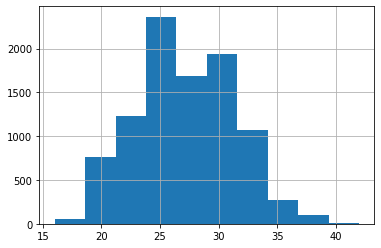

In [7]:
# Distribution of Ages
df_fifa["Age"].hist()

In [9]:
# Conversion of the Joined column to datetime
df_fifa["Joined"] = pd.to_datetime(df_fifa["Joined"])

In [10]:
# Checking players
mask = (df_fifa["Joined"].dt.year < 2011)
players_more_than10years = df_fifa[mask]
players_more_than10years.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
15,165153,K. Benzema,Karim Benzema,https://cdn.sofifa.com/players/165/153/21_60.png,http://sofifa.com/player/165153/karim-benzema/...,France,32,89,89,\n\n\n\nReal Madrid,...,Medium,Low,4 ★,74,85,81,86,40,76,216
16,155862,Sergio Ramos,Sergio Ramos García,https://cdn.sofifa.com/players/155/862/21_60.png,http://sofifa.com/player/155862/sergio-ramos-g...,Spain,34,89,89,\n\n\n\nReal Madrid,...,High,Medium,4 ★,71,70,76,73,88,85,212
23,202126,H. Kane,Harry Kane,https://cdn.sofifa.com/players/202/126/21_60.png,http://sofifa.com/player/202126/harry-kane/210...,England,26,88,89,\n\n\n\nTottenham Hotspur,...,High,High,3 ★,68,91,80,80,47,83,332
39,138956,G. Chiellini,Giorgio Chiellini,https://cdn.sofifa.com/players/138/956/21_60.png,http://sofifa.com/player/138956/giorgio-chiell...,Italy,35,87,87,\n\n\n\nJuventus,...,Medium,High,4 ★,66,46,58,60,90,79,130


In [11]:
# What was the earliest entry date
players_more_than10years["Joined"].min()

Timestamp('2002-01-01 00:00:00')

In [12]:
# Looking for the longest affiliated players
players_more_than10years[players_more_than10years["Joined"] == players_more_than10years["Joined"].min()].head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
501,148119,I. Akinfeev,Igor Akinfeev,https://cdn.sofifa.com/players/148/119/21_60.png,http://sofifa.com/player/148119/igor-akinfeev/...,Russia,34,80,80,\n\n\n\nPFC CSKA Moscow,...,Medium,Medium,3 ★,77,72,78,84,50,82,18
4770,184900,Kim Kwang Suk,Kwang Suk Kim,https://cdn.sofifa.com/players/184/900/21_60.png,http://sofifa.com/player/184900/kwang-suk-kim/...,Korea Republic,37,70,70,\n\n\n\nPohang Steelers,...,Low,High,1 ★,65,42,51,55,70,72,3


In [86]:
# Who are the oldest players?
df_fifa[df_fifa["Age"] == df_fifa["Age"].max()]

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
262,1179,G. Buffon,Gianluigi Buffon,https://cdn.sofifa.com/players/001/179/21_60.png,http://sofifa.com/player/1179/gianluigi-buffon...,Italy,42,82,82,\n\n\n\nJuventus,...,Medium,Medium,4 ★,77,76,74,78,33,91,131
1083,153260,Hilton,Vitorino Hilton da Silva,https://cdn.sofifa.com/players/153/260/21_60.png,http://sofifa.com/player/153260/vitorino-hilto...,Brazil,42,77,77,\n\n\n\nMontpellier HSC,...,Medium,Medium,2 ★,33,51,67,65,81,70,46
3964,156483,C. Lucchetti,Cristian Lucchetti,https://cdn.sofifa.com/players/156/483/21_60.png,http://sofifa.com/player/156483/cristian-lucch...,Argentina,42,71,71,\n\n\n\nAtlético Tucumán,...,Medium,Medium,1 ★,72,69,76,70,43,69,9


In [10]:
# Checking for * string in columns
star = df_fifa[df_fifa['IR'].str.contains('★')]
star


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9484,170472,J. Parr,Jonathan Parr,https://cdn.sofifa.com/players/170/472/21_60.png,http://sofifa.com/player/170472/jonathan-parr/...,Norway,31,66,66,\n\n\n\nStrømsgodset IF,...,Medium,Medium,1 ★,71,56,59,64,61,70,5
9485,240616,E. Bwomono,Elvis Bwomono,https://cdn.sofifa.com/players/240/616/21_60.png,http://sofifa.com/player/240616/elvis-bwomono/...,Uganda,21,66,75,\n\n\n\nSouthend United,...,High,Medium,1 ★,83,42,55,64,60,68,27
9486,227835,T. Tekie,Tesfaldet Tekie,https://cdn.sofifa.com/players/227/835/21_60.png,http://sofifa.com/player/227835/tesfaldet-teki...,Sweden,23,66,72,\n\n\n\nFortuna Sittard,...,Medium,Medium,1 ★,66,53,68,74,48,50,6
9487,207610,R. Meara,Ryan Meara,https://cdn.sofifa.com/players/207/610/21_60.png,http://sofifa.com/player/207610/ryan-meara/210...,United States,29,66,66,\n\n\n\nNew York Red Bulls,...,Medium,Medium,1 ★,65,64,61,70,46,66,5


In [11]:
# Check for Star string and remove
for i in df_fifa.columns:
    try:
        if df_fifa[i].dtype == 'object':
            df_fifa[i] = df_fifa[i].apply(lambda x : x.replace("★","")).astype(float)
            
        else:
            pass
    except:
        pass

In [12]:
# Check removing of * string
df_fifa['IR'].head()

0    5.0
1    5.0
2    3.0
3    4.0
4    5.0
Name: IR, dtype: float64

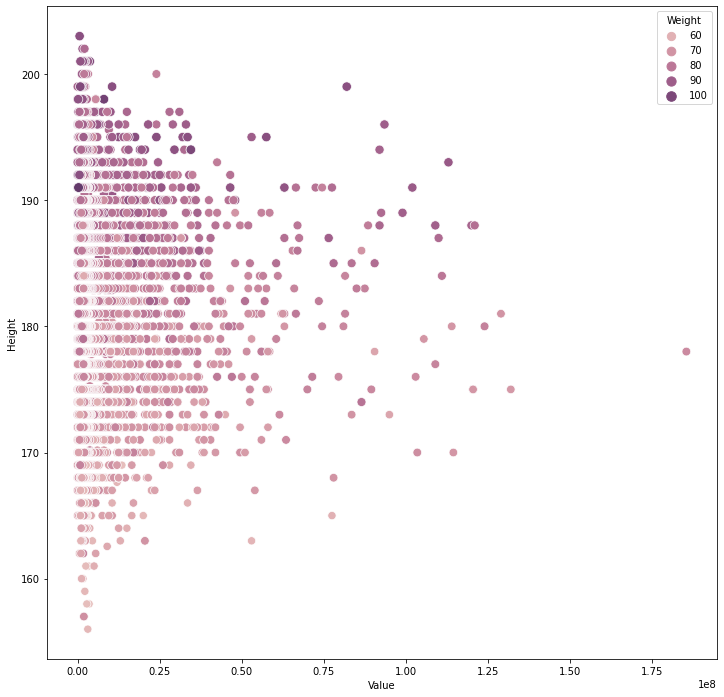

In [13]:
# Are Weight and Height related with the Player Value?
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
plt.figure(figsize=(12,12))
minsize = min(df_fifa["POT"])
maxsize = max(df_fifa["POT"])
ax = sns.scatterplot(x=df_fifa["Value"], y=df_fifa["Height"],
                    hue="Weight", size="Weight", sizes=(minsize, maxsize),
                    palette=cmap,
                    data=df_fifa)

<AxesSubplot:xlabel='EUR Wage', ylabel='EUR Market_Value'>

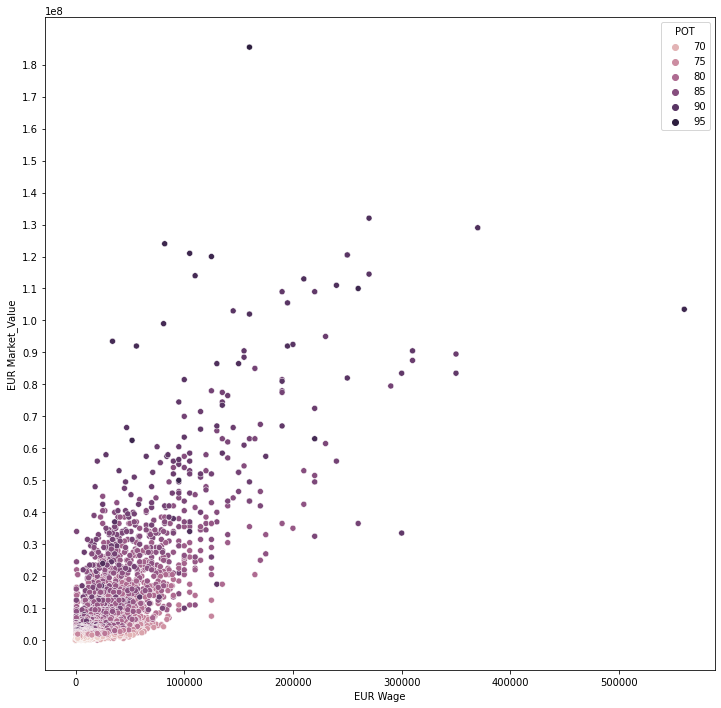

In [22]:
# Check Wage vs Player Value

plt.figure(figsize=(12,12))
plt.axes(xscale='linear', yscale='linear')
plt.xlabel("EUR Wage")
plt.ylabel("EUR Market_Value")
plt.yticks(np.arange(0, max(df_fifa["Value"]), 10000000))
sns.scatterplot(x=df_fifa["Wage"],y=df_fifa["Value"],data=df_fifa, hue="POT")


<AxesSubplot:xlabel='EUR Wage', ylabel='EUR Market_Value'>

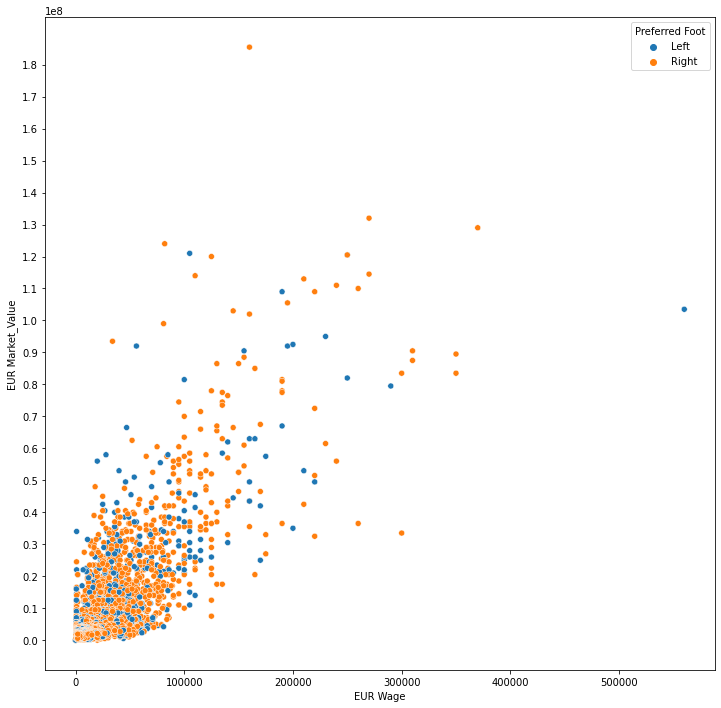

In [116]:
# Does the preferred foot has any impact on the Player Value?

plt.figure(figsize=(12,12))
plt.axes(xscale='linear', yscale='linear')
plt.xlabel("EUR Wage")
plt.ylabel("EUR Market_Value")
plt.yticks(np.arange(0, max(df_fifa["Value"]), 10000000))
sns.scatterplot(x=df_fifa["Wage"],y=df_fifa["Value"],data=df_fifa, hue="Preferred Foot")


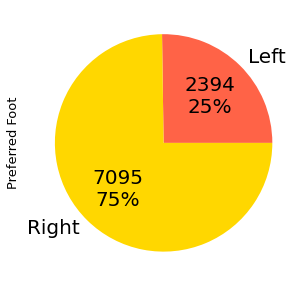

In [23]:
def label_function(val):
    return f'{val / 100 * len(df_fifa):.0f}\n{val:.0f}%'

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))

df_fifa.groupby('Preferred Foot').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue'], ax=ax1)

ax1.set_ylabel('Preferred Foot', size=13)
ax1.set_facecolor('white')
plt.show();

In [16]:

pd.set_option('display.max_columns', 80)
# Drop Hits & Loand Date End because information not complete and not relevant
print(df_fifa.info())
df_fifa.drop(["Hits","Loan Date End"],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9489 entries, 0 to 9488
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                9489 non-null   int64         
 1   Name              9489 non-null   object        
 2   LongName          9489 non-null   object        
 3   photoUrl          9489 non-null   object        
 4   playerUrl         9489 non-null   object        
 5   Nationality       9489 non-null   object        
 6   Age               9489 non-null   int64         
 7   ↓OVA              9489 non-null   int64         
 8   POT               9489 non-null   int64         
 9   Club              9489 non-null   object        
 10  Contract          9489 non-null   object        
 11  Positions         9489 non-null   object        
 12  Height            9489 non-null   object        
 13  Weight            9489 non-null   object        
 14  Preferred Foot    9489 n

In [14]:
## Delete Outliers 
df_fifa.drop(outlier(df_fifa),axis=0,inplace=True)


In [17]:
## Check interesting categorical variable
len(df_fifa['Positions'].unique())

515

In [15]:
# Make a copy of the dataset
df_fifa_work =  df_fifa.copy()

In [19]:
df_fifa_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9489 entries, 0 to 9488
Data columns (total 75 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                9489 non-null   int64         
 1   Name              9489 non-null   object        
 2   LongName          9489 non-null   object        
 3   photoUrl          9489 non-null   object        
 4   playerUrl         9489 non-null   object        
 5   Nationality       9489 non-null   object        
 6   Age               9489 non-null   int64         
 7   ↓OVA              9489 non-null   int64         
 8   POT               9489 non-null   int64         
 9   Club              9489 non-null   object        
 10  Contract          9489 non-null   object        
 11  Positions         9489 non-null   object        
 12  Height            9489 non-null   object        
 13  Weight            9489 non-null   object        
 14  Preferred Foot    9489 n

In [82]:
# Encoding the categorical variable to numbers
basic_encoding(df_fifa_work)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,...,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Name_encoded,LongName_encoded,photoUrl_encoded,playerUrl_encoded,Nationality_encoded,Club_encoded,Contract_encoded,Positions_encoded,Preferred Foot_encoded,Best Position_encoded,W/F_encoded,SM_encoded,A/W_encoded,D/W_encoded,IR_encoded
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170.0,72.0,Left,93,RW,2004-07-01,103500000.0,560000.0,138400000.0,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,...,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,5100,5289,80,80,5,207,3,457,0,12,3,3,2,1,4
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188.0,87.0,Right,91,GK,2014-07-16,120000000.0,125000.0,159400000.0,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,...,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,4120,3875,2242,2242,118,63,52,182,1,5,2,0,2,2,2
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181.0,70.0,Right,91,CAM,2015-08-30,129000000.0,370000.0,161000000.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,...,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,4589,4945,1604,1604,11,374,59,8,1,0,4,3,0,0,3
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175.0,68.0,Right,91,LW,2017-08-03,132000000.0,270000.0,166500000.0,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,...,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,6567,6655,1417,1417,16,436,71,279,1,8,4,4,0,2,4
5,188545,R. Lewandowski,Robert Lewandowski,https://cdn.sofifa.com/players/188/545/21_60.png,http://sofifa.com/player/188545/robert-lewando...,Poland,31,91,91,\n\n\n\nFC Bayern München,2014 ~ 2023,ST,184.0,80.0,Right,91,ST,2014-07-01,111000000.0,240000.0,132000000.0,423,71,94,85,84,89,407,85,79,85,70,88,407,77,78,77,93,82,420,...,88,88,96,35,42,19,51,15,6,12,8,10,2195,457,4,4,High,Medium,4,78,91,78,85,43,82,7249,7543,1136,1136,105,209,52,475,1,14,3,3,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9484,170472,J. Parr,Jonathan Parr,https://cdn.sofifa.com/players/170/472/21_60.png,http://sofifa.com/player/170472/jonathan-parr/...,Norway,31,66,66,\n\n\n\nStrømsgodset IF,2016 ~ 2022,LB,182.0,75.0,Left,66,LB,2016-01-13,625000.0,2000.0,594000.0,287,62,57,55,63,50,286,62,49,53,59,63,348,70,71,75,63,69,316,...,53,64,187,60,64,63,47,6,8,11,15,7,1761,381,4,3,Medium,Medium,1,71,56,59,64,61,70,4145,4291,297,297,99,574,64,183,0,6,3,2,2,2,0
9485,240616,E. Bwomono,Elvis Bwomono,https://cdn.sofifa.com/players/240/616/21_60.png,http://sofifa.com/player/240616/elvis-bwomono/...,Uganda,21

In [16]:
# Convert the datetime to float
df_fifa_work['Joined_float'] = dt64_to_float(df_fifa_work['Joined'].to_numpy())


In [17]:
# Delete the categorical and Date Columns
for i in df_fifa_work.columns:
        if df_fifa_work[i].dtype == 'object' or df_fifa_work[i].dtype == 'datetime64[ns]':
                df_fifa_work.drop(i,axis=1,inplace=True)

<AxesSubplot:>

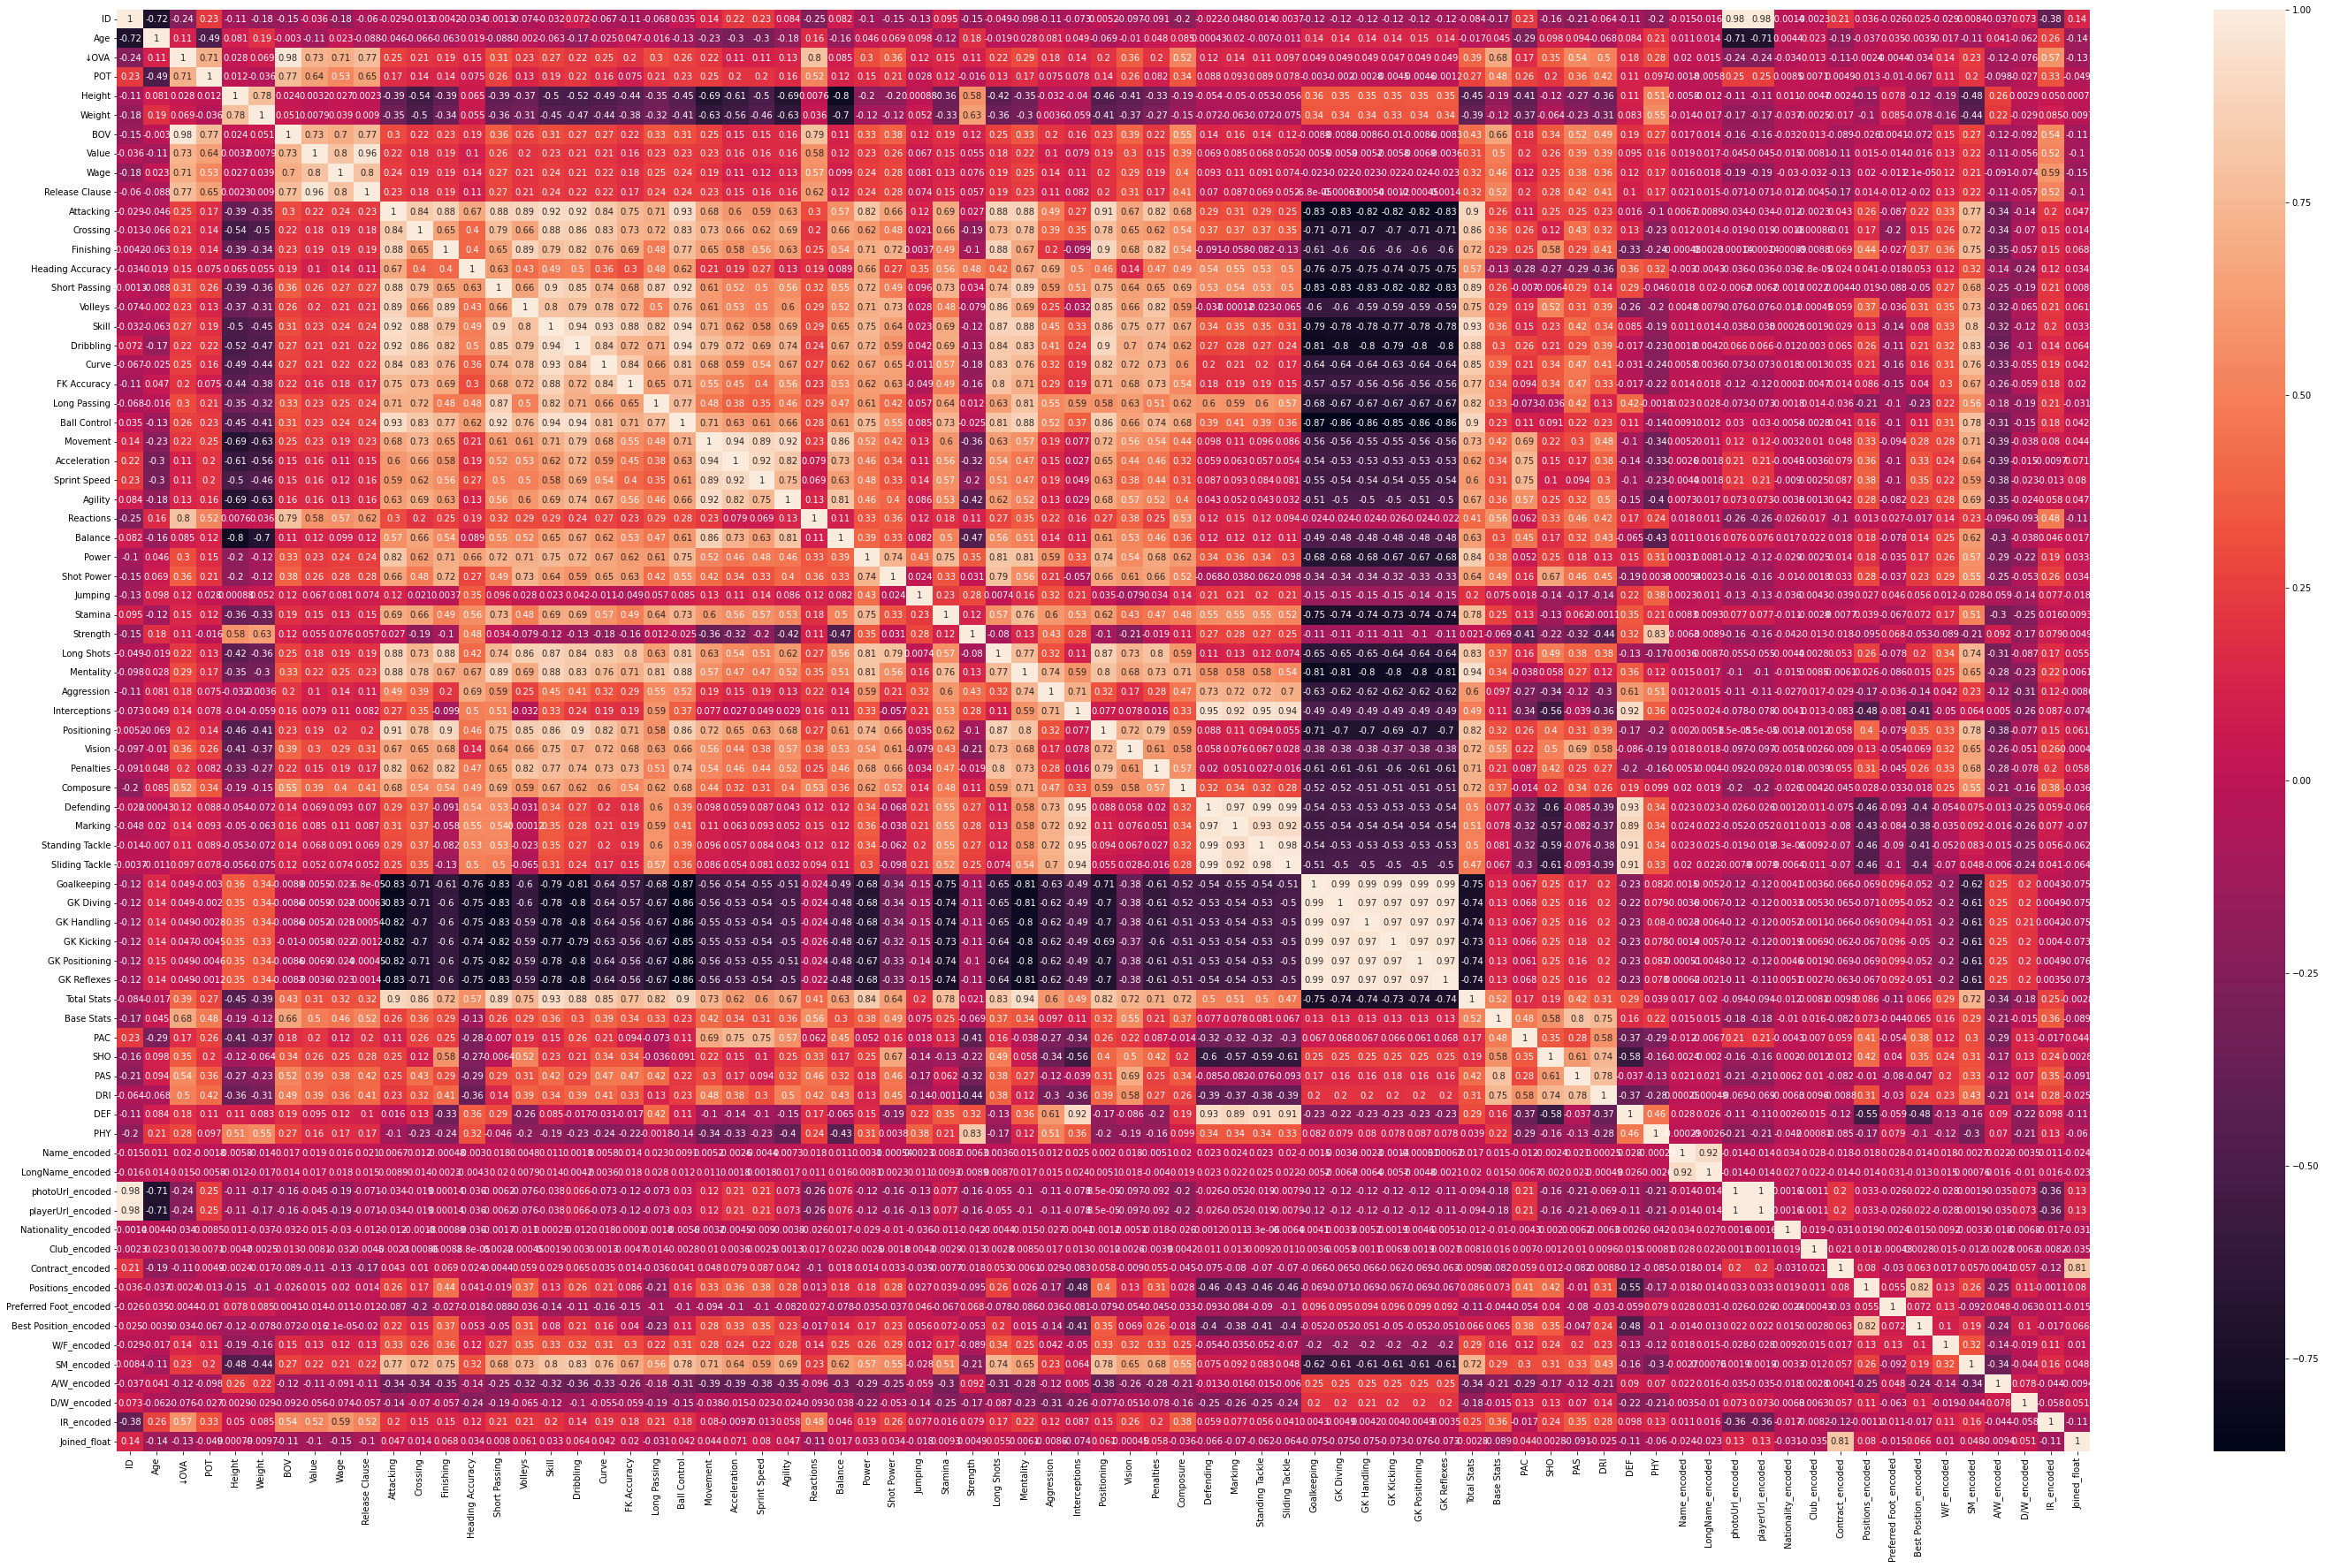

In [174]:
# Draw a Correlation Graph
correlation = df_fifa_work.corr()
plt.figure(figsize=(50,30))
sns.heatmap(correlation, annot=True)

In [165]:
correlation.Value

ID             -0.035985
Age            -0.112145
↓OVA            0.729443
POT             0.637028
Height          0.003244
                  ...   
SM_encoded      0.217842
A/W_encoded    -0.106886
D/W_encoded    -0.055627
IR_encoded      0.520149
Joined_float   -0.103338
Name: Value, Length: 75, dtype: float64

In [18]:
# Select KBest Features
from sklearn.feature_selection import SelectKBest

# Copy Values for the feature selection process
X = df_fifa_work.drop("Value",axis=1).copy()
y = df_fifa_work["Value"].copy()

In [39]:

print(X.shape)
sel = SelectKBest(k=5)
X_new = sel.fit_transform(X, y)
print(X_new.shape)
#print(sel.scores_)

skbest = pd.DataFrame({'column': X.columns, 'score': sel.scores_}).sort_values('score', ascending=False)

(9343, 74)
(9343, 5)


In [40]:
# Let's check the 10 most important features according to the selector
skbest.sort_values(by=["score"],ascending=False)
skbest.iloc[:12]

,column,score
8,Release Clause,691.153906
6,BOV,212.059804
3,POT,180.165722
2,↓OVA,160.711428
7,Wage,114.417615
25,Reactions,39.471679
51,Base Stats,25.793757
72,IR_encoded,21.250432
1,Age,20.867600
55,DRI,15.570784


In [183]:
# Checking correlation
thres = 0.8
df_corr_check = pd.DataFrame()

for col in correlation:
    for item in correlation[::-1]:
        
        value = correlation.loc[col,item]
        if value >= thres:
        #   print (col, item)
          #  print (correlation.loc[col,item])
            df2 = {"var1": col,"var2":item, "value":value}
            df_corr_check = df_corr_check.append(df2, ignore_index=True)

/tmp/ipykernel_4379/3299514054.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr_check = df_corr_check.append(df2, ignore_index=True)
/tmp/ipykernel_4379/3299514054.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr_check = df_corr_check.append(df2, ignore_index=True)
/tmp/ipykernel_4379/3299514054.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr_check = df_corr_check.append(df2, ignore_index=True)
/tmp/ipykernel_4379/3299514054.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_corr_check = df_corr_check.append(df2, ignore_index=True)
/tmp/ipykernel_4379/3299514054.py:14: FutureWarning: The frame.a

In [184]:
df_corr_check.sort_values(by=["value"])[["var2","value"]]
df_corr_check.groupby(by=["var2","var1"])[["var2","value"]].sum()

value
var2              var1                       
A/W_encoded       A/W_encoded        1.000000
Acceleration      Acceleration       1.000000
                  Agility            0.824943
                  Movement           0.941693
                  Sprint Speed       0.917942
...                                       ...
playerUrl_encoded photoUrl_encoded   1.000000
                  playerUrl_encoded  1.000000
↓OVA              BOV                0.975114
                  Reactions          0.800154
                  ↓OVA               1.000000

[309 rows x 1 columns]

In [191]:
## Taking a view on which Features do have the mayor correlations overall
grupo = df_corr_check.groupby(["var2","var1"])[["value"]].sum().sort_values(by=["value","var1"],ascending=False)
grupo.groupby(by=["var1"])[["value"]].mean().sort_values(by=["value"],ascending=False)[:50]

,value
var1,
A/W_encoded,1.000000
Stamina,1.000000
PAC,1.000000
POT,1.000000
Jumping,1.000000
Preferred Foot_encoded,1.000000
IR_encoded,1.000000
Height,1.000000
Heading Accuracy,1.000000


In [192]:
df_fifa_work.columns

Index(['ID', 'Age', '↓OVA', 'POT', 'Height', 'Weight', 'BOV', 'Value', 'Wage',
       'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Name_encoded',
       'LongName_encoded', 'photoUrl_encoded', 'playerUrl_encoded',
       'Nationality_encoded', 'Club_encoded', 'Contract_encoded',
       'Positions_encoded', 'Preferred Foot_encoded'

In [85]:
## Different Versions of data selection


# X = df_fifa_work[['Release Clause', 'Wage', 'BOV', 'IR', 'POT',
#        'Reactions', 'Base Stats', 'PAS', 'DRI', 'Composure', 'Total Stats',
#        'Vision', 'Shot Power', 'Power', 'SHO',
#        'Skill', 'Ball Control', 'SM',
#        'Movement', 'Volleys', 'PHY', 'Crossing',
#        'Positioning', 'FK Accuracy', 'PAC', 'Stamina',
#        'Penalties']]


# X = df_fifa_work [['Base Stats',
# 'Composure',
#  'Goalkeeping',
#   'Vision', 
#   'Mentality', 
#   'Shot Power', 
#   'Reactions',
#   'Release Clause',
#   'BOV',
#     'Shot Power',
#   'Wage'
#   ]]

# X = df_fifa_work [['↓OVA', 'POT', 'BOV', 'Wage', 'Release Clause', 'Attacking',
#        'Crossing', 'Finishing', 'Short Passing', 'Volleys', 'Skill',
#        'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
#        'Movement', 'Reactions', 'Power', 'Shot Power', 'Stamina', 'Long Shots',
#        'Mentality', 'Positioning', 'Vision', 'Penalties', 'Composure',
#        'Total Stats', 'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI',
#        'PHY']]


#X = df_fifa_work [["Release Clause","Composure","Wage","Total Stats", "POT","↓OVA", "Age"]]

X = df_fifa_work.drop(columns=['Value'], axis=1)


y = df_fifa_work [['Value']]

In [19]:
# Train Test Split
X = X[:1600]
y = y[:1600]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=40)

escalar = MinMaxScaler()
X_train_scale = escalar.fit_transform(X_train)
X_test_scale = escalar.fit_transform(X_test)

n_pca_components = 11
pca = PCA(whiten=True, n_components=n_pca_components )
pc_items = pca.fit_transform(X_train_scale)
items_pca = pd.DataFrame(pc_items)



variance = pd.DataFrame(pca.explained_variance_ratio_)


items_pca.shape

(1216, 11)

In [93]:
np.cumsum(pca.explained_variance_ratio_)

array([0.31150443, 0.47858079, 0.54480596, 0.60361722, 0.65235639,
       0.69740067, 0.73846029, 0.77798432, 0.8123397 , 0.839189  ,
       0.86330151])

,mean_absolute_error
Linear,3.027238e+06
Ridge,2.944686e+06
Bayesian Ridge,1.288568e+07
Hubber,1.050776e+07
Lasso,2.770071e+06
Bagging,2.156196e+06
RandomForest,2.003297e+06
AdaBoost,3.384196e+06
SVM RBF,1.176821e+07
SVM Linear,1.176810e+07


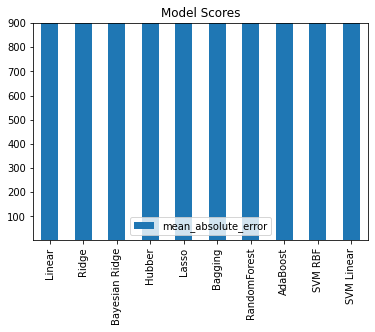

In [94]:

def lets_try(train,labels):
    results={}
    error = "mean_absolute_error"
    def test_model(clf):
        
        cv = KFold(n_splits=10,shuffle=True,random_state=40)
        scorer = make_scorer(mean_absolute_error)
        sc_val_score = cross_val_score(clf, train, labels, cv=cv,scoring=scorer)
        scores=[sc_val_score.mean()]
        return scores


    clf =  linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=[error] 
    
    
    
  #  results.plot(kind="bar",title="Model Scores")
  #  axes = plt.gca()
   # axes.set_ylim([0.5,results.max()])
    return results


    

lets_try(X_train_scale,y_train)

In [223]:
from sklearn.model_selection import RandomizedSearchCV
# Params for the grid search
param_grids = {'n_estimators': [300,400,500,600],
               'max_features': ['auto'],
               'max_depth': [2, 5, 10],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
}

# Build the grid search
dfrst = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = dfrst, param_distributions = param_grids, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scale, y_train)
rf_random.best_params_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-pa

[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   8.1s


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   8.5s


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  14.6s


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  15.5s


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  16.0s


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   8.7s


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  43.4s


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  43.9s


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time= 1.1min


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time= 1.1min


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time= 1.1min


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=  18.9s


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=  19.3s


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  47.3s


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time= 1.8min


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=  56.9s


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time= 1.7min


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=  54.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time= 1.7min


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-pa

[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=  57.9s


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=  19.8s


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=  36.1s


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  22.9s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  22.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=  37.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=  35.7s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  18.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time= 1.3min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time= 1.3min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time= 1.3min


/home/christian/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/home/christian/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [270]:
rf_random.best_estimator_

0

In [95]:
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(398,400, 1)
modelo = RandomForestRegressor(
                n_estimators = 400,
                criterion    = 'absolute_error',
                max_features = 'auto',
                max_depth=10,
                min_samples_leaf=1,
                min_samples_split=5
                #
             )
    
    # Error de train
modelo.fit(X_train_scale, y_train)
predicciones = modelo.predict(X_test_scale)
rmse = mean_squared_error(
        y_true  = y_train,
        y_pred  = predicciones,
        squared = False
        )
train_scores.append(rmse)

# Error de validación cruzada
scores = cross_val_score(
        estimator = modelo,
        X         = X_train_scale,
        y         = y_train,
        scoring   = 'neg_mean_absolute_error',
        cv        = 5
        )
# Se agregan los scores de cross_val_score() y se pasa a positivo
cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("mean absolute error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")


#predict_train = modelo.predict(X_train_scale)
predict_test  = predicciones
print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**0.5)
print('MAPE%: ',  mean_absolute_percentage_error(y_test, predict_test))
print('MAE: ',  mean_absolute_error(y_test, predict_test))

KeyboardInterrupt: 

In [21]:
# RAndom Forest 1
rf = RandomForestRegressor( n_estimators = 400,
                criterion    = 'absolute_error',
                max_features = 'auto',
                random_state = 40)

rf.fit(X_train_scale,y_train.values.ravel())
#predict_train = rf.predict(X_train_scale)
predict_test  = rf.predict(X_test_scale)

print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**0.5)
print('MAPE%: ',  mean_absolute_percentage_error(y_test, predict_test))
print('MAE: ',  mean_absolute_error(y_test, predict_test))

RMSE on test data:  7924367.794686532
MAPE%:  9.146030922941509e+19
MAE:  5021350.748697917


In [ ]:
pd.to_pickle

In [97]:
# Linear Regression 1
model_LR = LinearRegression()
model_LR.fit(X_train,y_train)


# predict the target on train and test data 
predict_train = model_LR.predict(X_train_scale)
predict_test  = model_LR.predict(X_test_scale)

print('RMSE on test data: ',  mean_squared_error(y_test, predict_test)**0.5)
print('MAPE%: ',  mean_absolute_percentage_error(y_test, predict_test))
print('MAE: ',  mean_absolute_error(y_test, predict_test))

RMSE on test data:  2852574618.401723
MAPE%:  5.051774273739927e+23
MAE:  2852517660.3359947


In [98]:
# Random Forest 2
rf_regressor = RandomForestRegressor(n_estimators=450,max_features='auto',max_depth=8, criterion="absolute_error",random_state=43)
rf_regressor.fit(X_train_scale,y_train)
pred_y =rf_regressor.predict(X_test_scale)
rf_score=rf_regressor.score(X_test_scale,y_test)
expl_rf = explained_variance_score(pred_y,y_test)
print('RMSE on test data: ',  mean_squared_error(y_test, pred_y)**0.5)
print('MAPE%: ',  mean_absolute_percentage_error(y_test, pred_y))
print('MAE: ',  mean_absolute_error(y_test, pred_y))

RMSE on test data:  7937677.928486004
MAPE%:  8.54139726203162e+19
MAE:  5113261.501736111


In [99]:
# ADA Boost 1
ada_reg = AdaBoostRegressor(n_estimators=300)
ada_reg.fit(X_train_scale, y_train)

y_pred_ada_reg = ada_reg.predict(X_test_scale)
print('RMSE on test data: ',  mean_squared_error(y_test, y_pred_ada_reg)**0.5)
print('MAPE%: ',  mean_absolute_percentage_error(y_test, y_pred_ada_reg))
print('MAE: ',  mean_absolute_error(y_test, y_pred_ada_reg))

RMSE on test data:  7799952.494431534
MAPE%:  1.5460221124382742e+21
MAE:  5698346.14372071
